In [19]:
pip install jsmetrics

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install cmasher

Note: you may need to restart the kernel to use updated packages.


In [26]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm
import FuncionesERA5 as fsE5
import jsmetrics

In [27]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(xlab,fontsize=10)
    plt.ylabel(ylab,fontsize=10)
    plt.title(title,fontsize=11)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8)

### **<font color="Purple"> Datos de ERA-5 </font>**

In [28]:
fileu_era5 = 'datasets/u_200_500_daily1979-2019.nc'

In [29]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [30]:
u_ds.var

<bound method DatasetAggregations.var of <xarray.Dataset> Size: 2GB
Dimensions:    (time: 14761, bnds: 2, longitude: 173, latitude: 59, level: 2)
Coordinates:
  * time       (time) datetime64[ns] 118kB 1979-01-01T11:30:00 ... 2019-05-31...
  * longitude  (longitude) float32 692B 195.8 196.5 197.2 ... 323.2 324.0 324.8
  * latitude   (latitude) float32 236B 44.25 43.5 42.75 42.0 ... 2.25 1.5 0.75
  * level      (level) float64 16B 200.0 500.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 236kB ...
    u          (time, level, latitude, longitude) float64 2GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    history:      Mon Jul 29 09:19:55 2019: cdo mergetime 1979_daily.nc 1980_...
    Conventions:  CF-1.5
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...>

In [31]:
lonsE5 = u_era5.longitude
latsE5 = u_era5.latitude

### **<font color="Purple"> Datos de HadGEM3 </font>**

In [34]:
u_99= 'datasets/uaday200hpa_99_mx.nc'
u_14='datasets/uaday200hpa_14_mx.nc'

In [36]:
# Abrir archivos y seleccionar variables a usar 
u_ds99=xr.open_dataset(u_99)
ua99=u_ds99['ua']  
u_ds14=xr.open_dataset(u_14)
ua14=u_ds14['ua']

In [37]:
latsHG = ua99.lat
lonsHG = ua99.lon

----
## **<font color="crimson"> HadGEM3 vs ERA-5 (anual) </font>**

#### **<font color="Purple"> Datos de viento ERA-5 (anual) </font>**

In [38]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(level=200)

In [39]:
u200E5_anual=u200E5.mean(dim='time') 

#### **<font color="Purple"> Datos de viento HadGEM3 (anual) </font>**

In [40]:
u200HG = xr.concat([ua99, ua14], dim='time')

In [41]:
u200HG_anual = u200HG.mean(dim='time')


#### **<font color="Purple"> Datos HadGEM3 de viento zonal en DJF</font>**

In [42]:
u200HG_season=u200HG.groupby(u200HG.time.dt.season).mean(dim='time') 
uHG_DJF = u200HG_season[0]


#### **<font color="Purple"> Datos ERA-5 de viento zonal en DJF</font>**


In [43]:
u200E5_season = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')
uE5_DJF = u200E5_season[0]

In [44]:
import cmasher

In [45]:
cmashermap=cmasher.savanna_r

Text(0.5, 1.0, 'ERA-5 (1979-2019)')

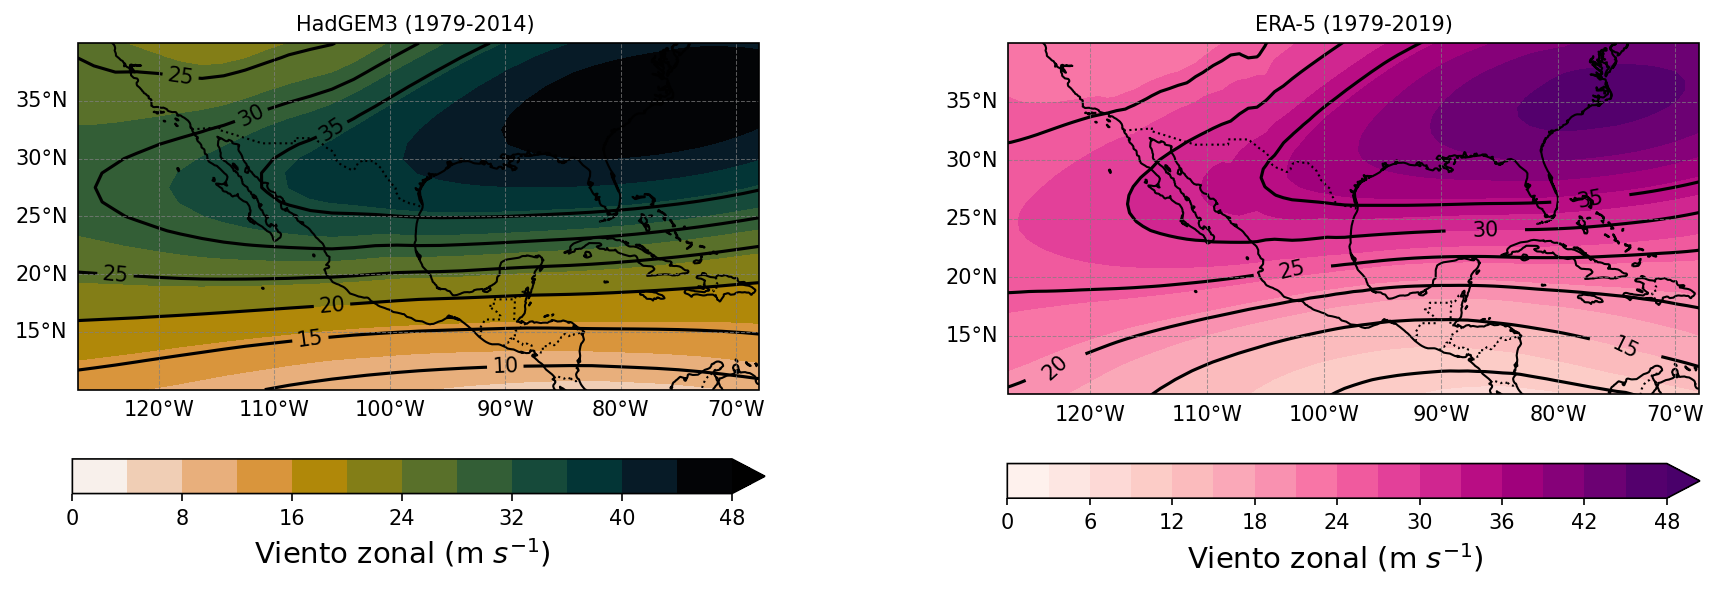

In [46]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

# Subplot 1
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
cs = ax1.contourf(lonsHG, latsHG, uHG_DJF, levels=np.arange(0, 50,4), cmap=cmashermap, extend='max', transform=ccrs.PlateCarree())
cc=ax1.contour(lonsHG, latsHG, uHG_DJF,levels=np.arange(0,40,5),colors='k',transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
plt.title('HadGEM3 (1979-2014) ', fontsize=10)

# Subplot 2
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
cs = ax2.contourf(lonsE5, latsE5, uE5_DJF, levels=np.arange(0, 50, 3), cmap='RdPu', extend='max', transform=ccrs.PlateCarree())
cc=ax2.contour(lonsE5,latsE5,uE5_DJF,levels=np.arange(0,40,5),colors='k',transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.09, ax=ax2)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=14)
plt.title('ERA-5 (1979-2019)', fontsize=10)

# plt.tight_layout(h_pad=3)
# plt.subplots_adjust(top=0.8)
# fig.suptitle('Viento zonal a 200 hPa durante DJF',fontsize=14,color="K");
#plt.savefig("Estadística.png", bbox_inches='tight')

   
#### **<font color="crimson"> Viento zonal anual y en DJF en HadGEM y en ERA-5</font>**


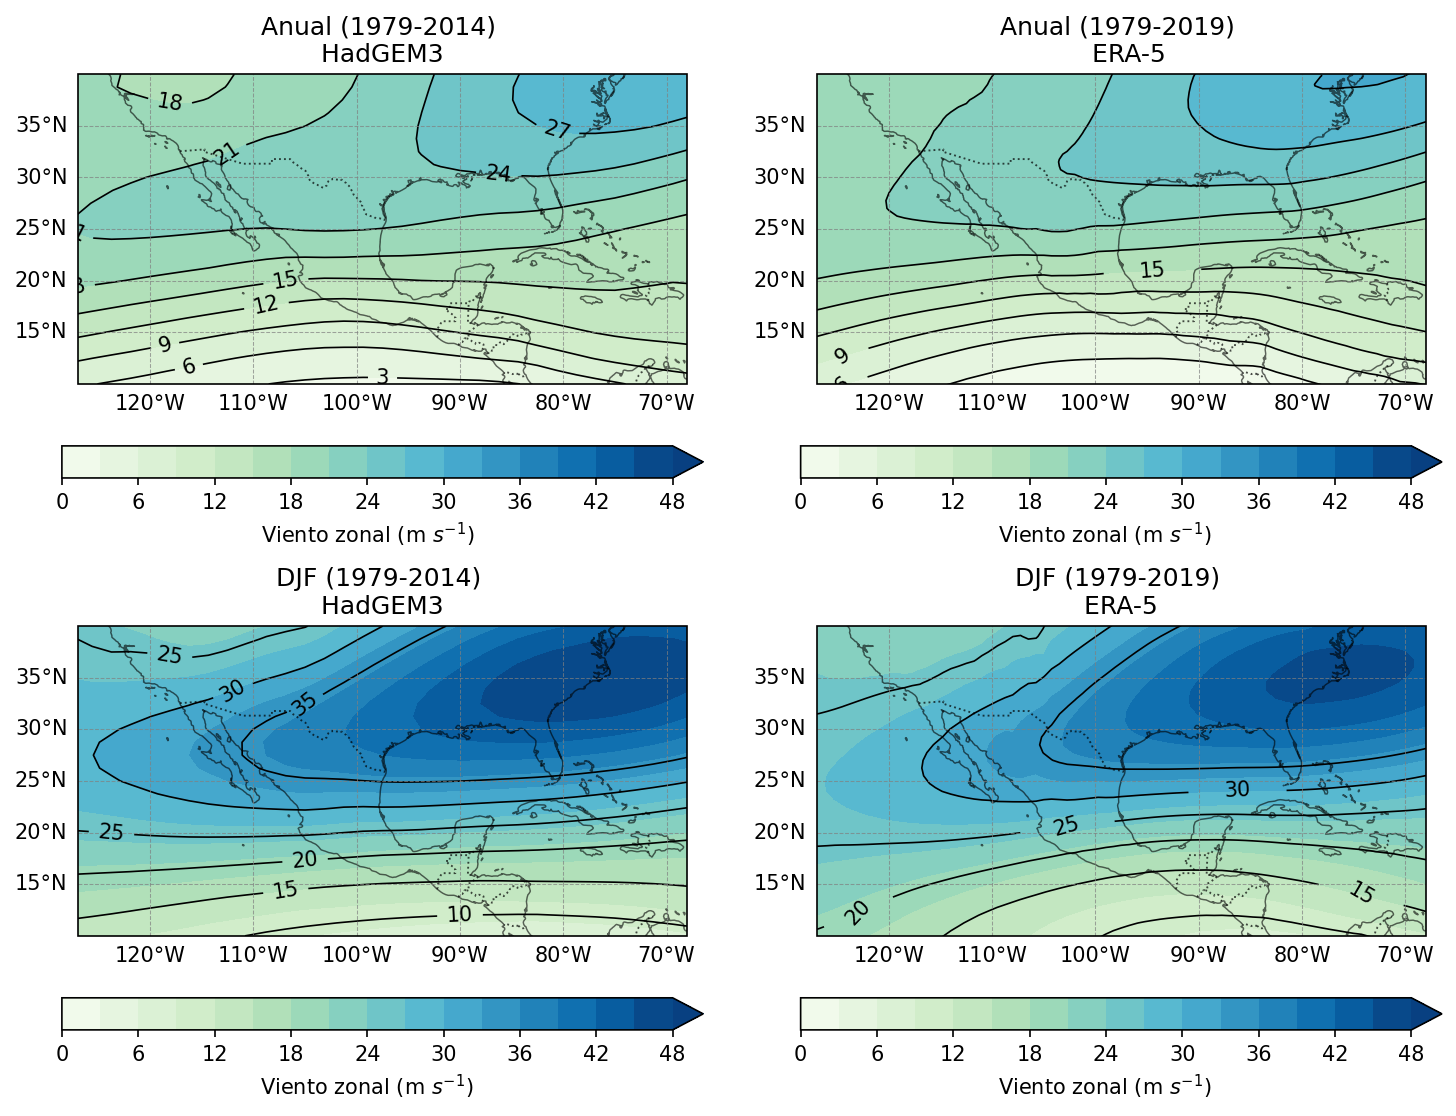

In [55]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# Subplot 1 ANUAL HadGEM
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=0.7,alpha=0.6)
cs = ax1.contourf(lonsHG, latsHG, u200HG_anual, levels=np.arange(0, 50,3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc=ax1.contour(lonsHG, latsHG, u200HG_anual,levels=np.arange(0,40,3),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
plt.title('Anual (1979-2014) \n HadGEM3 ', fontsize=12)

# Subplot 2 ANUAL ERA5
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=0.7,alpha=0.6)
cs = ax2.contourf(lonsE5, latsE5, u200E5_anual, levels=np.arange(0, 50, 3),cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc=ax2.contour(lonsE5,latsE5,u200E5_anual,levels=np.arange(0,40,3),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=10)
plt.title('Anual (1979-2019) \n  ERA-5', fontsize=12)

# Subplot 3 DJF JOYA
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=0.7,alpha=0.6)
cs = ax3.contourf(lonsHG, latsHG, uHG_DJF, levels=np.arange(0, 50,3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc=ax3.contour(lonsHG, latsHG, uHG_DJF,levels=np.arange(0,40,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax3.clabel(cc, cc.levels, inline=True, fontsize=10)
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax3)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=10)
plt.title('DJF (1979-2014) \n HadGEM3 ', fontsize=12)

# Subplot 4 DJF ERA 5
ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines(linewidth=0.7,alpha=0.6)
cs = ax4.contourf(lonsE5, latsE5, uE5_DJF, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc=ax4.contour(lonsE5,latsE5,uE5_DJF,levels=np.arange(0,40,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax4.clabel(cc, cc.levels, inline=True, fontsize=10)
ax4.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax4.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax4)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=10)
plt.title('DJF (1979-2019) \n ERA-5 ', fontsize=12)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
# plt.suptitle('Viento zonal diario promedio a 200 hPa',fontsize=14,color="k",fontstyle='italic',fontweight='bold');

#plt.savefig('1_Viento_zonal.png')

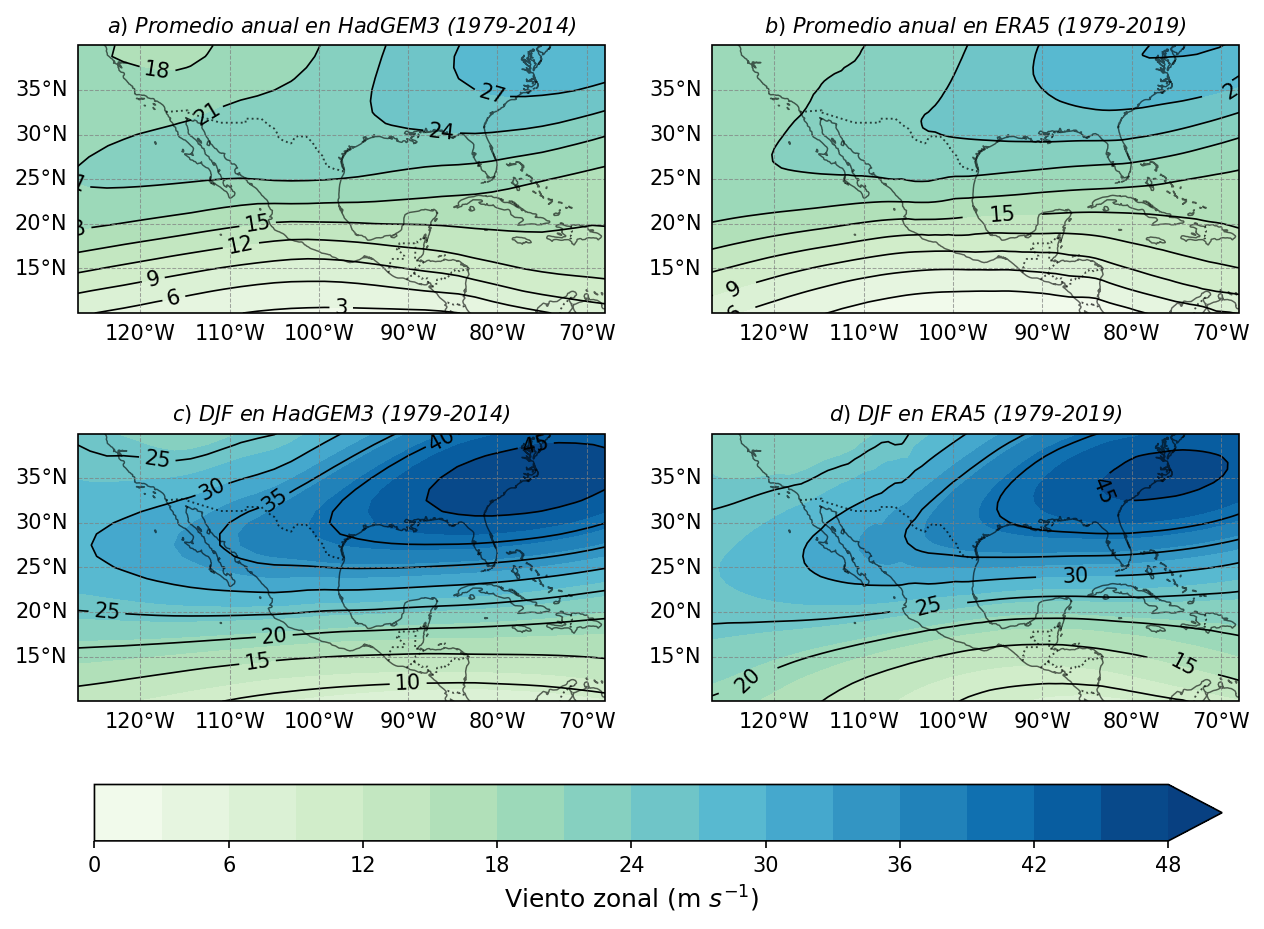

In [56]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.2, hspace=0.45)

# Crear subplots individuales
# Subplot 1 ANUAL HadGEM
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=0.7, alpha=0.6)
cs1 = ax1.contourf(lonsHG, latsHG, u200HG_anual, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax1.contour(lonsHG, latsHG, u200HG_anual, levels=np.arange(0, 40, 3), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('a$)$ Promedio anual en HadGEM3 (1979-2014)', fontsize=10,fontstyle='italic')

# Subplot 2 ANUAL ERA5
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=0.7, alpha=0.6)
cs2 = ax2.contourf(lonsE5, latsE5, u200E5_anual, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax2.contour(lonsE5, latsE5, u200E5_anual, levels=np.arange(0, 40, 3), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('b$)$ Promedio anual en ERA5 (1979-2019)', fontsize=10,fontstyle='italic')

# Subplot 3 DJF HadGEM
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=0.7, alpha=0.6)
cs3 = ax3.contourf(lonsHG, latsHG, uHG_DJF, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax3.contour(lonsHG, latsHG, uHG_DJF, levels=np.arange(0, 50, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax3.clabel(cc, cc.levels, inline=True, fontsize=10)
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('c$)$ DJF en HadGEM3 (1979-2014)', fontsize=10,fontstyle='italic')

# Subplot 4 DJF ERA5
ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines(linewidth=0.7, alpha=0.6)
cs4 = ax4.contourf(lonsE5, latsE5, uE5_DJF, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax4.contour(lonsE5, latsE5, uE5_DJF, levels=np.arange(0, 50, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax4.clabel(cc, cc.levels, inline=True, fontsize=10)
ax4.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax4.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('d$)$ DJF en ERA5 (1979-2019)', fontsize=10,fontstyle='italic')

# Crear un único colorbar compartido
cbar = plt.colorbar(cs4, ax=[ax1, ax2, ax3, ax4], orientation='horizontal', fraction=0.2, pad=0.09,shrink=0.97)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=12)

# plt.suptitle('Viento zonal diario promedio a 200 hPa', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

# plt.show()

plt.savefig('figs/1_Viento_zonal1.png')

In [57]:
def recortes1a1 (ua1,latA,latB,lonA,lonB,año):
    """
    Esta función nos recortará los datos (años,latitudes, longitudes) para usarlos en otras funciones 
    ua1,va1: viento (zonal,meridional) de la simulación 1 
    ua2,va2:  viento (zonal,meridional) de la simulación 2
    latA,latB: recorte de latitudes de menor (A) a mayor (B)
    lonA,lonB: recorte de longitudes de menor (A) a mayor (B)
    """
    ua1["plev"]=ua1["plev"]/100

    ua1['units']='hPa'
    
    ua1 = ua1.sel(lat=slice(latA, latB), lon=slice(360-lonB, 360-lonA)).where(ua1.time.dt.year > año, drop=True)

    #Recorte para la temporada invernal en el HN
    
    ua1=ua1.where((ua1.time.dt.month==12)| (ua1.time.dt.month==1)| (ua1.time.dt.month==2),drop=True)
   
    return {'ua1': ua1}

In [58]:
def js_pos_intens (ua1,nivel):
    """
    Esta función encuentra la posición promedio y la intensidad, usando el método de Woollings et al. 2010
    ua1: Viento zonal de la simulación 1 (ua1)
    ua2: Viento zonal de la simulación 2 (ua2)
    nivel: a qué nivel de presión se hará el cálculo, en Pa
    
    """
    

    nivel = float(nivel)
    #Convertir el tiempo a gregoriano 
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    #Usamos jsmetrics statistics
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1.sel(plev=nivel),filter_freq=4,window_size=20)
    
    #POSICIÓN
    sim1_p=sim1["jet_lat"].groupby(sim1["jet_lat"].time.dt.year).mean() 
    
    #VELOCIDAD
    sim1_v=sim1["jet_speed"].groupby(sim1["jet_speed"].time.dt.year).mean()  
    
    return {'Posición del jet en simulación 1':sim1_p,
            'Velocidad del jet en simulación 1':sim1_v
            }

In [59]:
#recortes1a1 tiene argumentos(ua1,va1,latA,latB,lonA,lonB,año1)
recorteR = recortes1a1(u200HG,10,40,67,129,1978)

In [60]:
recorteR #ya está en hPa

{'ua1': <xarray.DataArray 'ua' (time: 3240, lat: 25, lon: 33)> Size: 11MB
 array([[[17.03125   , 13.65625   , 11.986328  , ..., 11.627686  ,
           9.355225  ,  6.89624   ],
         [17.483643  , 13.547607  , 12.538574  , ..., 15.182373  ,
          12.387207  ,  9.038574  ],
         [18.399658  , 14.196533  , 13.086914  , ..., 18.341064  ,
          15.794678  , 12.447266  ],
         ...,
         [40.214355  , 40.010742  , 39.984863  , ..., 51.630127  ,
          49.372314  , 46.753174  ],
         [46.66455   , 46.427734  , 46.508545  , ..., 51.97705   ,
          50.6167    , 48.84497   ],
         [51.07251   , 51.0459    , 51.546143  , ..., 52.349854  ,
          51.81543   , 50.86841   ]],
 
        [[12.787598  , 13.595459  , 13.628906  , ...,  9.232422  ,
           6.8669434 ,  2.9448242 ],
         [18.48706   , 18.45459   , 18.21167   , ..., 10.957031  ,
           7.708008  ,  3.7988281 ],
         [21.763916  , 21.284424  , 20.612793  , ..., 11.952881  ,
          

In [61]:
u200HG.plev

<xarray.DataArray 'plev' ()> Size: 8B
array(2.5)
Coordinates:
    plev     float64 8B 2.5
    units    <U3 12B 'hPa'

In [62]:
#js_pos_intens tiene argumentos (ua1,ua2,nivel) NIVEL ESTÁ EN hPa o en Pa???
POS_VEL = js_pos_intens(recorteR['ua1'],200)

KeyError: "no index found for coordinate 'plev'"

In [ ]:
POS_VEL

In [ ]:
def varianza1a1(sim1_p, sim1_v):
    # Varianza de posición
    var_1p = sim1_p.var().round(2)
    mean_1p = sim1_p.round(2)
    
    # Varianza de velocidad
    var_1v = sim1_v.var().round(2)
    mean_1v = sim1_v.round(2)
    
    # Datos para graficar varianza y medias
    graf_mean = [mean_1p, mean_1v]
    graf_var = [var_1p, var_1v]
    colors = ["#FF8F00", "#FF8F00"]
    colorf = ["#AF47D2", "#AF47D2"]
    eje = ["Latitud promedio [°N]", "Velocidad promedio [m/s]"]
    titulo = [
        [input("Nombre de la simulación 1: "), "Posición"],
        [input("Nombre de la simulación 1: "), "Velocidad"]
    ]

    # Crear la figura y los subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 7), dpi=120)  # 2 filas, 1 columna

    # Iterar para cada gráfico (latitud y velocidad)
    for i, value in enumerate(graf_mean):
        ax = axs[i]
        ax.plot(value.year, value, color=colors[i])
        ax.fill_between(value.year, value + graf_var[i], value - graf_var[i], alpha=0.2, color=colorf[i], label="Varianza")
        ax.set_xlim([value.year.min() - 1, value.year.max() + 1])
        ax.set_xlabel("Años")
        ax.set_ylabel(eje[i])
        ax.set_title(f"{titulo[i][1]} del Jet Subtropical durante \nel invierno boreal sobre el norte de México \n{titulo[i][0]}")
        ax.legend()

    # Ajustar el layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    fig.suptitle("Análisis estadístico del Jet Subtropical\n", fontsize=14, color="red")
    
    # Mostrar el gráfico
    plt.show()
    
    return fig


In [ ]:
VAR1a1 = varianza1a1(POS_VEL['Posición del jet en simulación 1'],
               POS_VEL['Velocidad del jet en simulación 1'],)

In [ ]:
def prob_posicion(ua1, ua2, nivel):
    # Solicitar títulos para las simulaciones
    titulo_sim1 = input("Título simulación 1: ")
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1.sel(plev=nivel), filter_freq=4, window_size=20)
    
    # Crear diccionario con resultados de las posiciones del Jet
    d_lat = {
        f'Posición del Jet Subtropical sobre el Norte de México durante el invierno boreal\n{titulo_sim1}': sim1['jet_lat'],
        }
    
    # Convertir calendario a gregoriano
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    # Configuración de la gráfica
    plt.figure(figsize=(23, 5), dpi=130)
    for i, (k, v) in enumerate(d_lat.items(), start=1):
        plt.subplot(1, len(d_lat), i)

        # Aplanar los datos y crear histograma
        valores_M = v.data.flatten()
        plt.hist(valores_M, bins=7, density=True, histtype='stepfilled', facecolor='b', alpha=0.75)

        # Calcular y mostrar la media
        media = v.mean().values
        plt.axvline(media, color="red", linewidth=1, linestyle="dashed", label=f'Media={media:.2f}')

        # Configuración del plot
        lineplot_setup(None, None, '$Latitud$', 'Densidad de probabilidad', title=f'Distribución para {k}', legend=True)

    plt.tight_layout()
    plt.show()

    return plt.gcf()


In [ ]:
PROB_POS = prob_posicion(recorteR['ua1'],200) #nivel en hPa?

In [ ]:
def prob_vel (ua1,ua2, nivel):
    titulo_sim1 = input("Título simulación 1: ")
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1.sel(plev=nivel), filter_freq=4, window_size=20)
    
    d_vel = {
        f'velocidad del Jet Subtropical sobre el Norte de México durante el invierno boreal\n{titulo_sim1}': sim1['jet_speed']
    }

    # Convertir calendario a gregoriano
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    plt.figure(figsize=(23, 5), dpi=130)
    for i, (k, v) in enumerate(d_vel.items(), start=1):
        plt.subplot(1, len(d_vel), i)
        valores_M = v.data.flatten()
        plt.hist(valores_M, bins=20, density=True, histtype='stepfilled', facecolor='b', alpha=0.75)
        media = v.mean()
        plt.axvline(media, color="red", linewidth=1, linestyle="dashed", label=f'Media={media.values:.2f}')

        media=v.mean()
        lineplot_setup(None, None, '$Velocidad(m/s)$', 'Densidad de probabilidad', title=f'Distribución para {k}', legend=True)
    plt.tight_layout()
    plt.show()
    return plt.gcf

In [ ]:
PROB_VEL = prob_vel(recorteR['ua1'],200) #nivel en hPa?